In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import clone_model, load_model
from sklearn.manifold import TSNE

from model.vae import VAE
from data.mnist import mnist_data
from data.utils import sample_and_categorize
from model.utils import clone_encoder
from train_vae import plot_encodings2d_with_labels
from model.XAI_classifier import xai_model

In [5]:
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=60000)
# print(samples.shape)
# print(sample_labels.shape)

x_train = np.reshape(samples, (-1, 784))
x_train_samples = np.reshape(samples, (-1, 784))

In [6]:
model_pre = VAE(latent_dim=10)

dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=100, batch_size=100)

Epoch 1/100
600/600 [==============================] - 7s 10ms/step - loss: 137.6115
Epoch 2/100
144/600 [======>.......................] - ETA: 4s - loss: 110.6580

KeyboardInterrupt: 

In [28]:
model_pre.save()

In [17]:
vae_model = VAE.load(model_path="trained_models/VAE")

In [18]:
classifier = vae_model.classifier()

In [24]:
cnn = load_model("trained_models/CNN/classifier.h5")
xai = xai_model(vae_model.decoder, cnn, input_shape=(10,))

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
encodings_samples_2d = tsne.fit_transform(encodings_pretrain)

1/1 [==============================] - 0s 166ms/step
[2.5328820e-08 8.3275320e-10 3.1553508e-08 1.9449233e-04 4.6753357e-09
 9.9980217e-01 7.3135389e-08 2.3931621e-09 6.0867946e-09 3.2630251e-06]


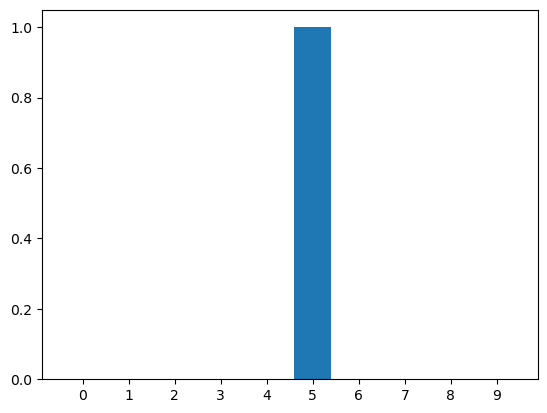

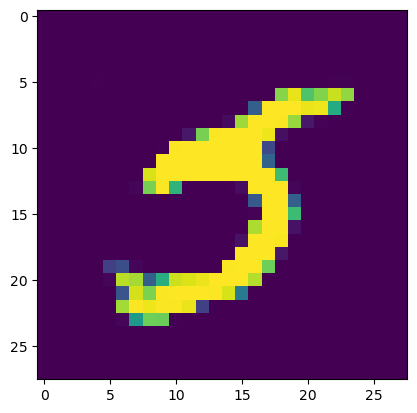

In [26]:
z = [2, 2, 1, 2, 1, 2, 0, 1, 1, 0]

img = vae_model.decoder.predict([z])
img = np.reshape(img[0], (28, 28))
y = xai.predict([z])[0]

print(y)
plt.bar(range(len(y)), y)
plt.xticks(range(len(y)), range(len(y)))

plt.show()
plt.imshow(img)

In [10]:
encodings_pretrain.shape

(60000, 10)

In [37]:
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)

NameError: name 'sample_and_categorize' is not defined